In [83]:
# file path / directory handling
import os 
import config

# Data manipulation
import pandas as pd 
from pandasql import sqldf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# to display important warning messages from Python
import warnings
warnings.filterwarnings('ignore')

In [84]:
# Construct the full path to the CSV file
fuel_price_csv_path = os.path.join(config.DATA_HOME_PATH, config.CSV_SUBDIRECTORY, config.DATASET_FUEL_PRICE)

# Check if the file exists
if os.path.exists(fuel_price_csv_path):
    # Read the CSV file using pandas
    eda_fuelprice = pd.read_csv(fuel_price_csv_path)
    print("CSV file has been loaded successfully!")
    print(eda_fuelprice.head())  # Display the first few rows of the dataframe
else:
    print(f"Error: The file {fuel_price_csv_path} does not exist.")

CSV file has been loaded successfully!
  series_type        date  ron95  ron97  diesel
0       level  2017-03-30   2.13   2.41    2.11
1       level  2017-04-06   2.16   2.43    2.08
2       level  2017-04-13   2.24   2.52    2.16
3       level  2017-04-20   2.27   2.54    2.21
4       level  2017-04-27   2.21   2.49    2.14


In [85]:
print(eda_fuelprice.head())  # Prints the first 5 rows
print(eda_fuelprice.tail())  # Prints the last 5 rows

  series_type        date  ron95  ron97  diesel
0       level  2017-03-30   2.13   2.41    2.11
1       level  2017-04-06   2.16   2.43    2.08
2       level  2017-04-13   2.24   2.52    2.16
3       level  2017-04-20   2.27   2.54    2.21
4       level  2017-04-27   2.21   2.49    2.14
       series_type        date  ron95  ron97  diesel
676  change_weekly  2024-01-04    0.0    0.0     0.0
677  change_weekly  2024-01-11    0.0    0.0     0.0
678  change_weekly  2024-01-18    0.0    0.0     0.0
679  change_weekly  2024-01-25    0.0    0.0     0.0
680  change_weekly  2024-02-01    0.0    0.0     0.0


# *Exploratory Data Analytics*

# **Data Preprocessing**
## Data Clealiness Check

In [86]:
print(eda_fuelprice.info())  # Prints the summary of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 681 entries, 0 to 680
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   series_type  681 non-null    object 
 1   date         681 non-null    object 
 2   ron95        681 non-null    float64
 3   ron97        681 non-null    float64
 4   diesel       681 non-null    float64
dtypes: float64(3), object(2)
memory usage: 26.7+ KB
None


In [87]:
print(eda_fuelprice.columns)  # Prints the column names

Index(['series_type', 'date', 'ron95', 'ron97', 'diesel'], dtype='object')


In [88]:
print(eda_fuelprice.shape)  # Prints the number of rows and columns

(681, 5)


In [89]:
print(eda_fuelprice.isnull().sum())  # Prints the number of missing values

series_type    0
date           0
ron95          0
ron97          0
diesel         0
dtype: int64


In [90]:
# Number of unique values in each column
unique_count = eda_fuelprice['series_type'].nunique()
distinct_values = eda_fuelprice['series_type'].unique()
print(f"Number of unique values in 'series_type' is {unique_count}")
print(f"The unique values in 'series_type' are {distinct_values}")

# Calculating character counts for each distinct value
char_counts = {value: len(value) for value in distinct_values}
print(f"The distinct length of character counts in 'series_type' is {char_counts}")

Number of unique values in 'series_type' is 2
The unique values in 'series_type' are ['level' 'change_weekly']
The distinct length of character counts in 'series_type' is {'level': 5, 'change_weekly': 13}


In [91]:
min_date = eda_fuelprice['date'].min()
max_date = eda_fuelprice['date'].max() 

print(f"The earliest 'date' is {min_date}")
print(f"The latest 'date' is {max_date}")

The earliest 'date' is 2017-03-30
The latest 'date' is 2024-02-01


In [92]:
print(eda_fuelprice.describe())  # Prints the summary statistics

            ron95       ron97      diesel
count  681.000000  681.000000  681.000000
mean     1.011292    1.416153    1.049677
std      1.020154    1.495230    1.055169
min     -0.380000   -0.360000   -0.170000
25%      0.000000    0.000000    0.000000
50%      1.250000    1.550000    1.400000
75%      2.050000    2.620000    2.150000
max      2.380000    4.840000    2.340000


It is inferrable that the summary statistics of current fuelprice dataset is less meaningful without data preprocessing, due to data structure at series_type column. 

In [93]:
eda_fuelprice_level = eda_fuelprice[eda_fuelprice["series_type"] == "level"]
print(f"The top 5 rows of fuelprice from level context is") 
eda_fuelprice_level.head()

The top 5 rows of fuelprice from level context is


,series_type,date,ron95,ron97,diesel
0,level,2017-03-30,2.13,2.41,2.11
1,level,2017-04-06,2.16,2.43,2.08
2,level,2017-04-13,2.24,2.52,2.16
3,level,2017-04-20,2.27,2.54,2.21
4,level,2017-04-27,2.21,2.49,2.14


In [94]:
print(f"The last 5 rows of fuelprice from level context is") 
eda_fuelprice_level.tail()

The last 5 rows of fuelprice from level context is


,series_type,date,ron95,ron97,diesel
336,level,2024-01-04,2.05,3.47,2.15
337,level,2024-01-11,2.05,3.47,2.15
338,level,2024-01-18,2.05,3.47,2.15
339,level,2024-01-25,2.05,3.47,2.15
340,level,2024-02-01,2.05,3.47,2.15


In [95]:
print(f"The shape of fuelprice from level context is {eda_fuelprice_level.shape}")

The shape of fuelprice from level context is (341, 5)


In [96]:
eda_fuelprice_changes = eda_fuelprice[eda_fuelprice["series_type"] == "change_weekly"]
print(f"The top 5 rows of fuelprice from change_weekly context is") 
eda_fuelprice_changes.head()

The top 5 rows of fuelprice from change_weekly context is


,series_type,date,ron95,ron97,diesel
341,change_weekly,2017-04-06,0.03,0.02,-0.03
342,change_weekly,2017-04-13,0.08,0.09,0.08
343,change_weekly,2017-04-20,0.03,0.02,0.05
344,change_weekly,2017-04-27,-0.06,-0.05,-0.07
345,change_weekly,2017-05-04,-0.10,-0.10,-0.06


In [97]:
print(f"The last 5 rows of fuelprice from change_weekly context is") 
eda_fuelprice_changes.tail()

The last 5 rows of fuelprice from change_weekly context is


,series_type,date,ron95,ron97,diesel
676,change_weekly,2024-01-04,0.0,0.0,0.0
677,change_weekly,2024-01-11,0.0,0.0,0.0
678,change_weekly,2024-01-18,0.0,0.0,0.0
679,change_weekly,2024-01-25,0.0,0.0,0.0
680,change_weekly,2024-02-01,0.0,0.0,0.0


In [98]:
print(f"The shape of fuelprice from change_weekly context is {eda_fuelprice_changes.shape}")

The shape of fuelprice from change_weekly context is (340, 5)


It's discovered that change_weekly attribute give us 1 row lesser rewords than level attribute, where 2017-03-30 is not available in the change_weekly context. 

Thus, it is deducible and confirmed that change_weekly is calculated through deduction of price between two weeks of ron95, ron97 and diesel price level. 


### Change the Column Name of EDA Fuel Price according to Level or Change Weekly Attribute

In [99]:
eda_fuelprice_level_modified = eda_fuelprice_level.rename(columns={'ron95': 'ron95_price_level', 'ron97': 'ron97_price_level', 'diesel': 'diesel_price_level'})
print(eda_fuelprice_level_modified.columns)
eda_fuelprice_level_modified.head()

Index(['series_type', 'date', 'ron95_price_level', 'ron97_price_level',
       'diesel_price_level'],
      dtype='object')


,series_type,date,ron95_price_level,ron97_price_level,diesel_price_level
0,level,2017-03-30,2.13,2.41,2.11
1,level,2017-04-06,2.16,2.43,2.08
2,level,2017-04-13,2.24,2.52,2.16
3,level,2017-04-20,2.27,2.54,2.21
4,level,2017-04-27,2.21,2.49,2.14


In [100]:
# Sort the DataFrame by the 'date' column
eda_fuelprice_level_modified.sort_values(by='date', ascending=True, inplace=True)

# Convert 'date' column to datetime format
eda_fuelprice_level_modified['date'] = pd.to_datetime(eda_fuelprice_level_modified['date'])

# Format 'date' column into 'yyyy-mm-dd' format
eda_fuelprice_level_modified['date'] = eda_fuelprice_level_modified['date'].dt.strftime('%Y-%m-%d')

# Convert 'date' column to datetime format
eda_fuelprice_level_modified['date'] = pd.to_datetime(eda_fuelprice_level_modified['date'])

# Convert 'date' column to datetime format
eda_fuelprice_level_modified['date'] = pd.to_datetime(eda_fuelprice_level_modified['date'])

# Display the first few rows of the modified DataFrame
eda_fuelprice_level_modified.describe()

,date,ron95_price_level,ron97_price_level,diesel_price_level
count,341,341.000000,341.000000,341.000000
mean,2020-10-04 10:24:59.120234496,2.019853,2.825044,2.096158
min,2017-03-30 00:00:00,1.250000,1.550000,1.400000
25%,2019-03-09 00:00:00,2.050000,2.430000,2.150000
50%,2020-10-31 00:00:00,2.050000,2.620000,2.150000
75%,2022-06-16 00:00:00,2.080000,3.350000,2.180000
max,2024-02-01 00:00:00,2.380000,4.840000,2.340000
std,NaN,0.191481,0.692040,0.160866


In [101]:
eda_fuelprice_level_modified.head()

,series_type,date,ron95_price_level,ron97_price_level,diesel_price_level
0,level,2017-03-30,2.13,2.41,2.11
1,level,2017-04-06,2.16,2.43,2.08
2,level,2017-04-13,2.24,2.52,2.16
3,level,2017-04-20,2.27,2.54,2.21
4,level,2017-04-27,2.21,2.49,2.14


In [102]:
eda_fuelprice_changes_modified = eda_fuelprice_changes.rename(columns={'ron95': 'ron95_weeklychanges', 'ron97': 'ron97_weeklychanges', 'diesel': 'diesel_weeklychanges'})

print(eda_fuelprice_changes_modified.columns)
eda_fuelprice_changes_modified.head()

Index(['series_type', 'date', 'ron95_weeklychanges', 'ron97_weeklychanges',
       'diesel_weeklychanges'],
      dtype='object')


,series_type,date,ron95_weeklychanges,ron97_weeklychanges,diesel_weeklychanges
341,change_weekly,2017-04-06,0.03,0.02,-0.03
342,change_weekly,2017-04-13,0.08,0.09,0.08
343,change_weekly,2017-04-20,0.03,0.02,0.05
344,change_weekly,2017-04-27,-0.06,-0.05,-0.07
345,change_weekly,2017-05-04,-0.10,-0.10,-0.06


In [103]:
# Sort the DataFrame by the 'date' column
eda_fuelprice_changes_modified.sort_values(by='date', ascending=True, inplace=True)

# Convert 'date' column to datetime format
eda_fuelprice_changes_modified['date'] = pd.to_datetime(eda_fuelprice_changes_modified['date'])

# Format 'date' column into 'yyyy-mm-dd' format
eda_fuelprice_changes_modified['date'] = eda_fuelprice_changes_modified['date'].dt.strftime('%Y-%m-%d')

# Convert 'date' column to datetime format
eda_fuelprice_changes_modified['date'] = pd.to_datetime(eda_fuelprice_changes_modified['date'])

# Convert 'date' column to datetime format
eda_fuelprice_changes_modified['date'] = pd.to_datetime(eda_fuelprice_changes_modified['date'])

# Display the first few rows of the modified DataFrame
eda_fuelprice_changes_modified.describe()

,date,ron95_weeklychanges,ron97_weeklychanges,diesel_weeklychanges
count,340,340.000000,340.000000,340.000000
mean,2020-10-08 05:04:56.470588160,-0.000235,0.003118,0.000118
min,2017-04-06 00:00:00,-0.380000,-0.360000,-0.170000
25%,2019-03-14 06:00:00,0.000000,-0.010000,0.000000
50%,2020-11-03 12:00:00,0.000000,0.000000,0.000000
75%,2022-06-17 18:00:00,0.000000,0.030000,0.000000
max,2024-02-01 00:00:00,0.100000,0.370000,0.120000
std,NaN,0.037337,0.070983,0.031105


In [104]:
eda_fuelprice_changes_modified.head()

,series_type,date,ron95_weeklychanges,ron97_weeklychanges,diesel_weeklychanges
341,change_weekly,2017-04-06,0.03,0.02,-0.03
342,change_weekly,2017-04-13,0.08,0.09,0.08
343,change_weekly,2017-04-20,0.03,0.02,0.05
344,change_weekly,2017-04-27,-0.06,-0.05,-0.07
345,change_weekly,2017-05-04,-0.10,-0.10,-0.06


In [105]:
# Subtract 7 days from the date column in dataset eda_fuelprice_changes_modified
eda_fuelprice_changes_modified['date'] = eda_fuelprice_changes_modified['date'] - pd.Timedelta(days=7)

eda_fuelprice_changes_modified.head()

,series_type,date,ron95_weeklychanges,ron97_weeklychanges,diesel_weeklychanges
341,change_weekly,2017-03-30,0.03,0.02,-0.03
342,change_weekly,2017-04-06,0.08,0.09,0.08
343,change_weekly,2017-04-13,0.03,0.02,0.05
344,change_weekly,2017-04-20,-0.06,-0.05,-0.07
345,change_weekly,2017-04-27,-0.10,-0.10,-0.06


In [106]:
# Extract the first date value from DataFrame eda_fuelprice_level_modified
first_date_A = eda_fuelprice_level_modified['date'].iloc[0]

# Extract the first date value from DataFrame eda_fuelprice_changes_modified
first_date_B = eda_fuelprice_changes_modified['date'].iloc[0]

# Convert the extracted date values to datetime objects if needed
first_date_A = pd.to_datetime(first_date_A)
first_date_B = pd.to_datetime(first_date_B)

# Perform the subtraction operation
date_difference = first_date_A - first_date_B

print("Difference in days:", date_difference.days)


Difference in days: 0


The date column in fuel price changes table is modified successful through 7 days deduction. The execution of this step is verified through deduction between first date datum in eda_fuelprice_level_modified with first date datum in eda_fuelprice_changes_modified.  

In [107]:
# Merge datasets based on the modified date column in dataset eda_fuelprice_level_modified and date column in dataset eda_fuelprice_changes_modified
merged_df = pd.merge(eda_fuelprice_level_modified, eda_fuelprice_changes_modified, on='date', how='inner')

In [108]:
merged_df.describe()

,date,ron95_price_level,ron97_price_level,diesel_price_level,ron95_weeklychanges,ron97_weeklychanges,diesel_weeklychanges
count,328,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000
mean,2020-10-09 02:20:29.268292608,2.015823,2.821067,2.093384,0.000579,0.005152,0.000549
min,2017-03-30 00:00:00,1.250000,1.550000,1.400000,-0.380000,-0.360000,-0.170000
25%,2019-03-28 06:00:00,2.050000,2.410000,2.140000,0.000000,-0.010000,0.000000
50%,2020-11-03 12:00:00,2.050000,2.610000,2.150000,0.000000,0.000000,0.000000
75%,2022-06-17 18:00:00,2.080000,3.350000,2.180000,0.000000,0.030000,0.000000
max,2024-01-25 00:00:00,2.380000,4.840000,2.340000,0.100000,0.370000,0.120000
std,NaN,0.193606,0.695394,0.163387,0.034957,0.066041,0.030705


In [109]:
merged_df.head()

,series_type_x,date,ron95_price_level,ron97_price_level,diesel_price_level,series_type_y,ron95_weeklychanges,ron97_weeklychanges,diesel_weeklychanges
0,level,2017-03-30,2.13,2.41,2.11,change_weekly,0.03,0.02,-0.03
1,level,2017-04-06,2.16,2.43,2.08,change_weekly,0.08,0.09,0.08
2,level,2017-04-13,2.24,2.52,2.16,change_weekly,0.03,0.02,0.05
3,level,2017-04-20,2.27,2.54,2.21,change_weekly,-0.06,-0.05,-0.07
4,level,2017-04-27,2.21,2.49,2.14,change_weekly,-0.10,-0.10,-0.06


Now merged_df contains the merged dataset based on date from dataset eda_fuelprice_level and modified date (date - 7 days) from dataset eda_fuelprice_changes. 

Next, proceed to drop unnecessary column from merged_df data frame.

In [110]:
combined_df = merged_df.drop(columns=['series_type_x', 'series_type_y'])

In [111]:
print(f"The top 5 rows of fuel price from combined_df context is") 
combined_df.head()

The top 5 rows of fuel price from combined_df context is


,date,ron95_price_level,ron97_price_level,diesel_price_level,ron95_weeklychanges,ron97_weeklychanges,diesel_weeklychanges
0,2017-03-30,2.13,2.41,2.11,0.03,0.02,-0.03
1,2017-04-06,2.16,2.43,2.08,0.08,0.09,0.08
2,2017-04-13,2.24,2.52,2.16,0.03,0.02,0.05
3,2017-04-20,2.27,2.54,2.21,-0.06,-0.05,-0.07
4,2017-04-27,2.21,2.49,2.14,-0.10,-0.10,-0.06


In [112]:
print(f"The last 5 rows of fuel price from combined_df context is") 
combined_df.tail()

The last 5 rows of fuel price from combined_df context is


,date,ron95_price_level,ron97_price_level,diesel_price_level,ron95_weeklychanges,ron97_weeklychanges,diesel_weeklychanges
323,2023-12-28,2.05,3.47,2.15,0.0,0.0,0.0
324,2024-01-04,2.05,3.47,2.15,0.0,0.0,0.0
325,2024-01-11,2.05,3.47,2.15,0.0,0.0,0.0
326,2024-01-18,2.05,3.47,2.15,0.0,0.0,0.0
327,2024-01-25,2.05,3.47,2.15,0.0,0.0,0.0


In [113]:
# Assuming combined_df is already loaded and 'date' column is in datetime format.
# If 'date' is not in datetime format, convert it first
combined_df['date'] = pd.to_datetime(combined_df['date'])

# Get the minimum year in your dataset
start_year = combined_df['date'].dt.year.min()

# Create a start date for January of the minimum year
start_date = pd.Timestamp(year=start_year, month=1, day=1)

# Filter rows where the 'date' is greater than or equal to the start date
refined_df = combined_df[combined_df['date'] >= start_date]
refined_df.head(10)

,date,ron95_price_level,ron97_price_level,diesel_price_level,ron95_weeklychanges,ron97_weeklychanges,diesel_weeklychanges
0,2017-03-30,2.13,2.41,2.11,0.03,0.02,-0.03
1,2017-04-06,2.16,2.43,2.08,0.08,0.09,0.08
2,2017-04-13,2.24,2.52,2.16,0.03,0.02,0.05
3,2017-04-20,2.27,2.54,2.21,-0.06,-0.05,-0.07
4,2017-04-27,2.21,2.49,2.14,-0.10,-0.10,-0.06
5,2017-05-04,2.11,2.39,2.08,-0.10,-0.10,-0.13
6,2017-05-11,2.01,2.29,1.95,0.07,0.07,0.04
7,2017-05-18,2.08,2.36,1.99,0.04,0.04,0.04
8,2017-05-25,2.12,2.40,2.03,-0.02,-0.02,-0.01
9,2017-06-01,2.10,2.38,2.02,-0.05,-0.07,-0.08


In [114]:
# Define the cut-off date
cut_off_date = pd.Timestamp(year=2017, month=4, day=6)

# Filter rows where the 'date' is on or after the cut-off date
refined_df = refined_df[refined_df['date'] >= cut_off_date]
refined_df.head()

,date,ron95_price_level,ron97_price_level,diesel_price_level,ron95_weeklychanges,ron97_weeklychanges,diesel_weeklychanges
1,2017-04-06,2.16,2.43,2.08,0.08,0.09,0.08
2,2017-04-13,2.24,2.52,2.16,0.03,0.02,0.05
3,2017-04-20,2.27,2.54,2.21,-0.06,-0.05,-0.07
4,2017-04-27,2.21,2.49,2.14,-0.10,-0.10,-0.06
5,2017-05-04,2.11,2.39,2.08,-0.10,-0.10,-0.13


The `refined_df` now contains data from April 6, 2017, onwards

In [115]:
refined_df.tail(10)

,date,ron95_price_level,ron97_price_level,diesel_price_level,ron95_weeklychanges,ron97_weeklychanges,diesel_weeklychanges
318,2023-11-23,2.05,3.47,2.15,0.0,0.0,0.0
319,2023-11-30,2.05,3.47,2.15,0.0,0.0,0.0
320,2023-12-07,2.05,3.47,2.15,0.0,0.0,0.0
321,2023-12-14,2.05,3.47,2.15,0.0,0.0,0.0
322,2023-12-21,2.05,3.47,2.15,0.0,0.0,0.0
323,2023-12-28,2.05,3.47,2.15,0.0,0.0,0.0
324,2024-01-04,2.05,3.47,2.15,0.0,0.0,0.0
325,2024-01-11,2.05,3.47,2.15,0.0,0.0,0.0
326,2024-01-18,2.05,3.47,2.15,0.0,0.0,0.0
327,2024-01-25,2.05,3.47,2.15,0.0,0.0,0.0


In [116]:
# Define the cut-off date
cut_off_date = pd.Timestamp(year=2023, month=12, day=28)

# Filter rows where the 'date' is on or after the cut-off date
refined_df = refined_df[refined_df['date'] <= cut_off_date]
refined_df.tail()

,date,ron95_price_level,ron97_price_level,diesel_price_level,ron95_weeklychanges,ron97_weeklychanges,diesel_weeklychanges
319,2023-11-30,2.05,3.47,2.15,0.0,0.0,0.0
320,2023-12-07,2.05,3.47,2.15,0.0,0.0,0.0
321,2023-12-14,2.05,3.47,2.15,0.0,0.0,0.0
322,2023-12-21,2.05,3.47,2.15,0.0,0.0,0.0
323,2023-12-28,2.05,3.47,2.15,0.0,0.0,0.0


The `refined_df` now contains data up until December 28, 2023. 

In [117]:
ron95_difference = refined_df['ron95_price_level'].max() - refined_df['ron95_price_level'].min()
ron95_difference

1.13

In [118]:
diesel_difference = refined_df['diesel_price_level'].max() - refined_df['diesel_price_level'].min()
diesel_difference

0.94

In [119]:
ron97_difference = refined_df['ron97_price_level'].max() - refined_df['ron97_price_level'].min()
ron97_difference

3.29

It's discovered that there is not much ron95 and diesel price level changes between data from Q2 of 2017 and Q4 of December 2023. <br>
Only ron97 price level faces major price level adjustment between Q2 of 2017 and Q4 of December 2023.


In [120]:
print(f"The shape of fuelprice from refined_df context is {refined_df.shape}")

The shape of fuelprice from refined_df context is (323, 7)


In [121]:
refined_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 323 entries, 1 to 323
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   date                  323 non-null    datetime64[ns]
 1   ron95_price_level     323 non-null    float64       
 2   ron97_price_level     323 non-null    float64       
 3   diesel_price_level    323 non-null    float64       
 4   ron95_weeklychanges   323 non-null    float64       
 5   ron97_weeklychanges   323 non-null    float64       
 6   diesel_weeklychanges  323 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 20.2 KB


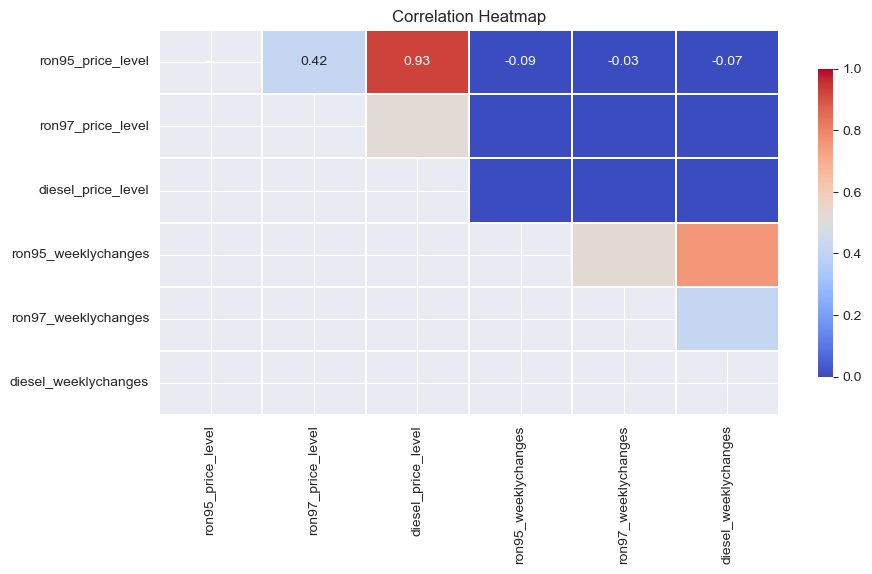

In [122]:
# Drop the 'date' column from the DataFrame before calculating the correlation matrix
numeric_data = refined_df.drop(columns=['date'])

# Round the numeric data to 3 decimal places
numeric_data_rounded = numeric_data.round(3)

# Calculate the correlation matrix
correlation_matrix = numeric_data_rounded.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 5))

# Generate a mask that covers the lower triangle of the correlation matrix
mask = np.tril(np.ones_like(correlation_matrix, dtype=bool))

# Plot the heatmap with an explicit format string for annotations
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap="coolwarm", fmt=".2f", vmax=1.0, vmin = 0.0, center=0.5, 
            linewidths=0.2, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap')
plt.show()

Since there are similar trends resembled combination of {ron95_price_level, ron97_price_level, diesel_price_level} and {ron95_weeklychanges, ron97_weeklychanges, diesel_weeklychanges}, we can proceed to choose either one of them for further data analytics. 

In [123]:
# Select the desired columns and overwrite the original DataFrame
refined_df = refined_df[['date', 'ron95_price_level', 'ron97_price_level', 'diesel_price_level']]

# Display the first few rows of the modified DataFrame
refined_df.head()

,date,ron95_price_level,ron97_price_level,diesel_price_level
1,2017-04-06,2.16,2.43,2.08
2,2017-04-13,2.24,2.52,2.16
3,2017-04-20,2.27,2.54,2.21
4,2017-04-27,2.21,2.49,2.14
5,2017-05-04,2.11,2.39,2.08


In [124]:
refined_df.dtypes

date                  datetime64[ns]
ron95_price_level            float64
ron97_price_level            float64
diesel_price_level           float64
dtype: object

## Time Series Analytics on Fuel Price Dataset from Quarterly Context

In [125]:
# Ensure 'date' column in 'refined_df' is in datetime format upfront
refined_df['date'] = pd.to_datetime(refined_df['date'])

# Create a function to perform resampling and formatting operations
def create_quarterly_data(df, operation):
    # Copy df to avoid modifying the original, set 'date' as the index, and resample
    result_df = df.copy().set_index('date').resample('Q').apply(operation)
    # Reset the index so 'date' becomes a column again
    result_df = result_df.reset_index()
    # Convert 'date' to a string representation of the month
    result_df['Quarter'] = result_df['date'].dt.to_period('Q').astype(str)
    # Optionally, if you want to drop the original 'date' column after creating 'Monthly'
    # result_df.drop('date', axis=1, inplace=True)
    return result_df

# Now use the function to create the mean, median, and sum DataFrames
quarterly_mean_data = create_quarterly_data(refined_df, 'mean')
quarterly_median_data = create_quarterly_data(refined_df, 'median')
quarterly_sum_data = create_quarterly_data(refined_df, 'sum')


In [126]:
quarterly_mean_data.head(7)

,date,ron95_price_level,ron97_price_level,diesel_price_level,Quarter
0,2017-06-30,2.086923,2.359231,2.015385,2017Q2
1,2017-09-30,2.100769,2.374615,2.033077,2017Q3
2,2017-12-31,2.255385,2.541538,2.193077,2017Q4
3,2018-03-31,2.243846,2.513077,2.239231,2018Q1
4,2018-06-30,2.200000,2.522222,2.180000,2018Q2
5,2018-09-30,2.200000,2.602500,2.180000,2018Q3
6,2018-12-31,NaN,NaN,NaN,2018Q4


In [127]:
quarterly_median_data.head(7)

,date,ron95_price_level,ron97_price_level,diesel_price_level,Quarter
0,2017-06-30,2.10,2.38,2.02,2017Q2
1,2017-09-30,2.15,2.43,2.04,2017Q3
2,2017-12-31,2.26,2.54,2.20,2017Q4
3,2018-03-31,2.23,2.50,2.19,2018Q1
4,2018-06-30,2.20,2.47,2.18,2018Q2
5,2018-09-30,2.20,2.60,2.18,2018Q3
6,2018-12-31,NaN,NaN,NaN,2018Q4


In [128]:
quarterly_sum_data.head(7)

,date,ron95_price_level,ron97_price_level,diesel_price_level,Quarter
0,2017-06-30,27.13,30.67,26.20,2017Q2
1,2017-09-30,27.31,30.87,26.43,2017Q3
2,2017-12-31,29.32,33.04,28.51,2017Q4
3,2018-03-31,29.17,32.67,29.11,2018Q1
4,2018-06-30,19.80,22.70,19.62,2018Q2
5,2018-09-30,17.60,20.82,17.44,2018Q3
6,2018-12-31,0.00,0.00,0.00,2018Q4


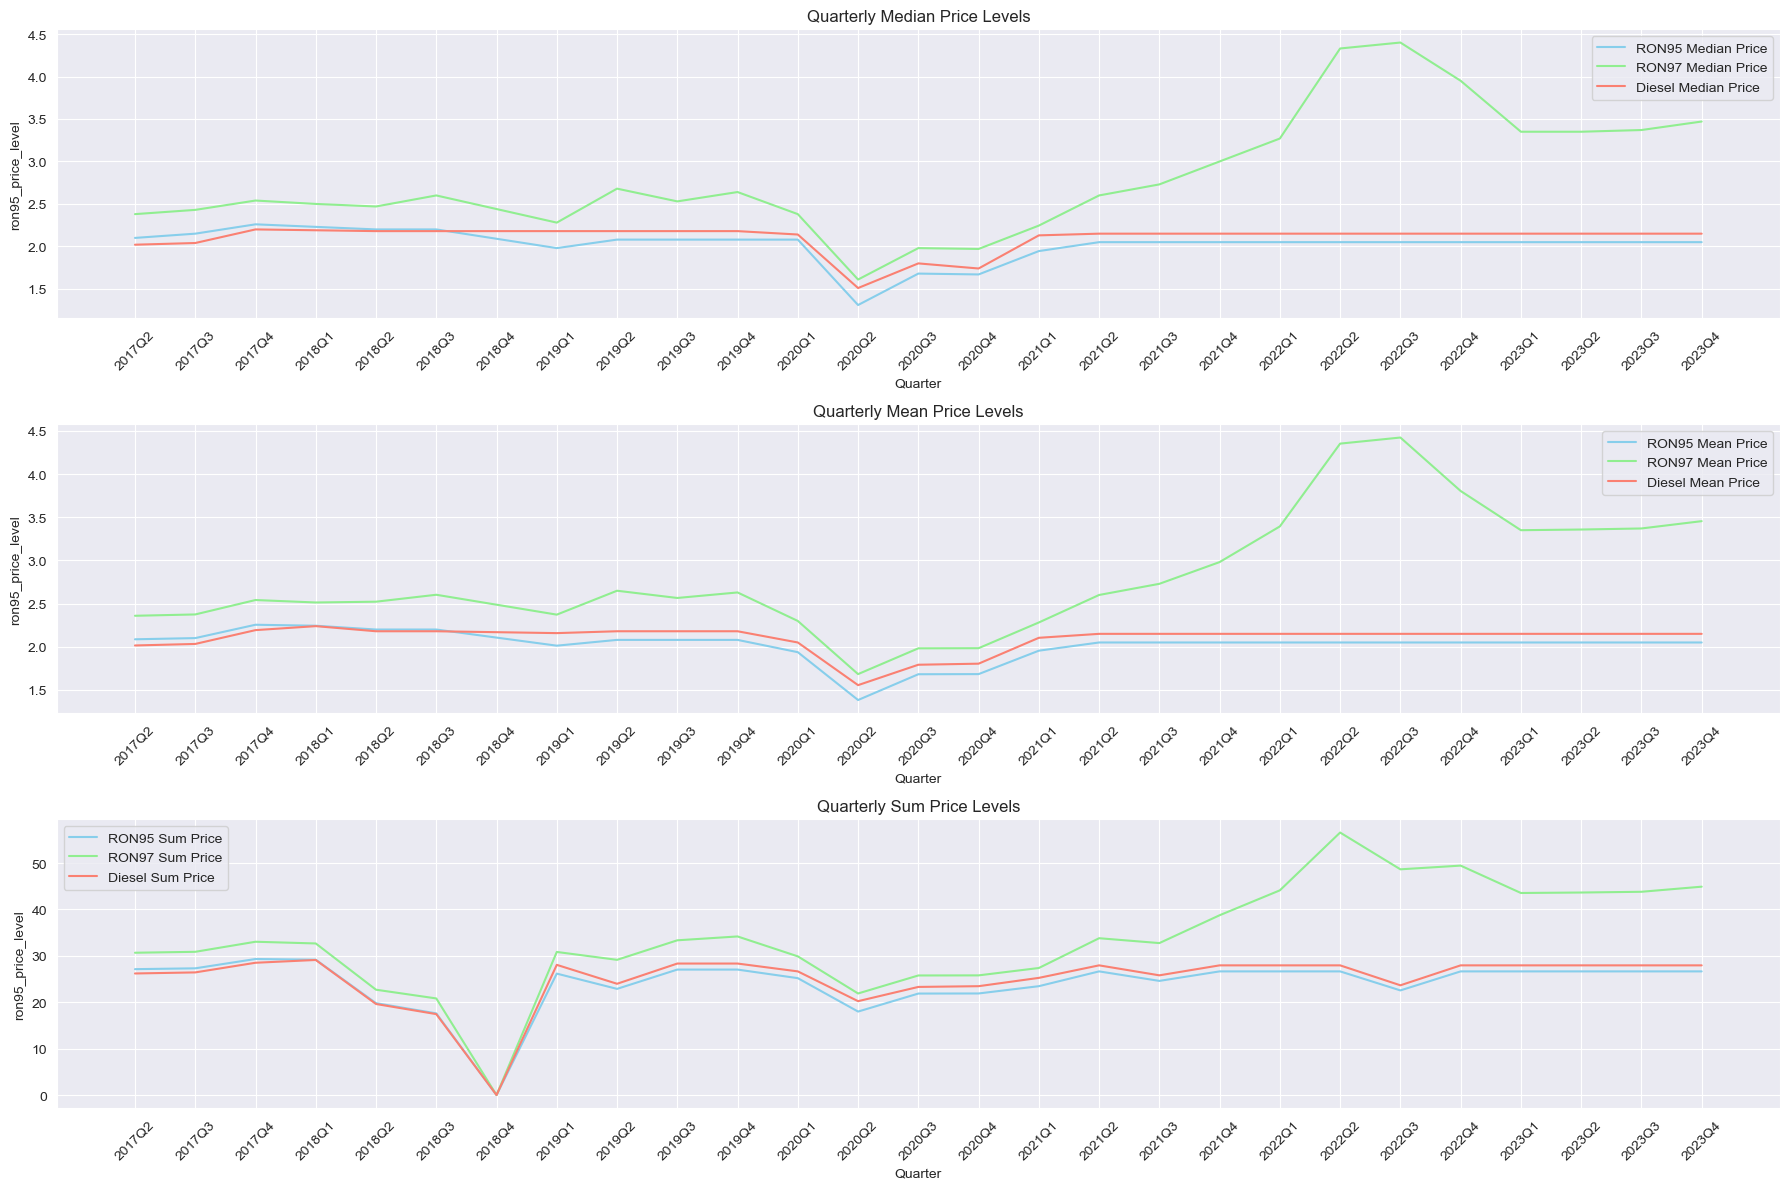

In [129]:
# Assuming DataFrames are prepared and named as follows:
# - quarterly_median_data for median values
# - quarterly_mean_data for mean values
# - quarterly_sum_data for sum values

# Color codes for consistency across plots
colors = {
    'RON95': 'skyblue',
    'RON97': 'lightgreen',
    'Diesel': 'salmon'
}

# Set the overall figure size for the subplot
plt.figure(figsize=(18, 12))

# First subplot for Median Price Levels
plt.subplot(3, 1, 1)  # (rows, columns, panel number)
sns.lineplot(x="Quarter", y="ron95_price_level", data=quarterly_median_data, label='RON95 Median Price', color=colors['RON95'])
sns.lineplot(x="Quarter", y="ron97_price_level", data=quarterly_median_data, label='RON97 Median Price', color=colors['RON97'])
sns.lineplot(x="Quarter", y="diesel_price_level", data=quarterly_median_data, label='Diesel Median Price', color=colors['Diesel'])
plt.title('Quarterly Median Price Levels')
plt.xticks(rotation=45)
plt.legend()

# Second subplot for Mean Price Levels
plt.subplot(3, 1, 2)  # Move to the second panel
sns.lineplot(x="Quarter", y="ron95_price_level", data=quarterly_mean_data, label='RON95 Mean Price', color=colors['RON95'])
sns.lineplot(x="Quarter", y="ron97_price_level", data=quarterly_mean_data, label='RON97 Mean Price', color=colors['RON97'])
sns.lineplot(x="Quarter", y="diesel_price_level", data=quarterly_mean_data, label='Diesel Mean Price', color=colors['Diesel'])
plt.title('Quarterly Mean Price Levels')
plt.xticks(rotation=45)
plt.legend()

# Third subplot for Sum Price Levels
plt.subplot(3, 1, 3)  # Move to the third panel
sns.lineplot(x="Quarter", y="ron95_price_level", data=quarterly_sum_data, label='RON95 Sum Price', color=colors['RON95'])
sns.lineplot(x="Quarter", y="ron97_price_level", data=quarterly_sum_data, label='RON97 Sum Price', color=colors['RON97'])
sns.lineplot(x="Quarter", y="diesel_price_level", data=quarterly_sum_data, label='Diesel Sum Price', color=colors['Diesel'])
plt.title('Quarterly Sum Price Levels')
plt.xticks(rotation=45)
plt.legend()

# Adjust layout to make room for the titles and ensure clear visibility
plt.tight_layout()

# Display the combined plot
plt.show()


In [130]:
quarterly_mean_data.head()

,date,ron95_price_level,ron97_price_level,diesel_price_level,Quarter
0,2017-06-30,2.086923,2.359231,2.015385,2017Q2
1,2017-09-30,2.100769,2.374615,2.033077,2017Q3
2,2017-12-31,2.255385,2.541538,2.193077,2017Q4
3,2018-03-31,2.243846,2.513077,2.239231,2018Q1
4,2018-06-30,2.200000,2.522222,2.180000,2018Q2


In [131]:
quarterly_mean_data.tail()

,date,ron95_price_level,ron97_price_level,diesel_price_level,Quarter
22,2022-12-31,2.05,3.803846,2.15,2022Q4
23,2023-03-31,2.05,3.350000,2.15,2023Q1
24,2023-06-30,2.05,3.357692,2.15,2023Q2
25,2023-09-30,2.05,3.370000,2.15,2023Q3
26,2023-12-31,2.05,3.454615,2.15,2023Q4


In [132]:
quarterly_median_data.head()

,date,ron95_price_level,ron97_price_level,diesel_price_level,Quarter
0,2017-06-30,2.10,2.38,2.02,2017Q2
1,2017-09-30,2.15,2.43,2.04,2017Q3
2,2017-12-31,2.26,2.54,2.20,2017Q4
3,2018-03-31,2.23,2.50,2.19,2018Q1
4,2018-06-30,2.20,2.47,2.18,2018Q2


In [133]:
quarterly_median_data.tail()

,date,ron95_price_level,ron97_price_level,diesel_price_level,Quarter
22,2022-12-31,2.05,3.95,2.15,2022Q4
23,2023-03-31,2.05,3.35,2.15,2023Q1
24,2023-06-30,2.05,3.35,2.15,2023Q2
25,2023-09-30,2.05,3.37,2.15,2023Q3
26,2023-12-31,2.05,3.47,2.15,2023Q4


In [134]:
quarterly_sum_data.head(7)

,date,ron95_price_level,ron97_price_level,diesel_price_level,Quarter
0,2017-06-30,27.13,30.67,26.20,2017Q2
1,2017-09-30,27.31,30.87,26.43,2017Q3
2,2017-12-31,29.32,33.04,28.51,2017Q4
3,2018-03-31,29.17,32.67,29.11,2018Q1
4,2018-06-30,19.80,22.70,19.62,2018Q2
5,2018-09-30,17.60,20.82,17.44,2018Q3
6,2018-12-31,0.00,0.00,0.00,2018Q4


In [135]:
quarterly_sum_data.tail(7)

,date,ron95_price_level,ron97_price_level,diesel_price_level,Quarter
20,2022-06-30,26.65,56.58,27.95,2022Q2
21,2022-09-30,22.55,48.65,23.65,2022Q3
22,2022-12-31,26.65,49.45,27.95,2022Q4
23,2023-03-31,26.65,43.55,27.95,2023Q1
24,2023-06-30,26.65,43.65,27.95,2023Q2
25,2023-09-30,26.65,43.81,27.95,2023Q3
26,2023-12-31,26.65,44.91,27.95,2023Q4


In view that our research focuses on anomaly time series analytics between time period of January 2022 to December 2023, and there are decremental and incremental price changes of RON95, RON97 and Diesel price detected, a new dataframe will be created for time series analytics from monthly context.

In [136]:
# Assuming 'refined_df' is pre-defined and the 'date' column is already in datetime format
# refined_df['date'] = pd.to_datetime(refined_df['date'])

def create_shortlisted_monthly_data(df, operation, start_date=None, end_date=None):
    """
    Creates monthly aggregated data based on the specified operation, 
    with optional filtering by start and end dates.
    
    Parameters:
    - df: DataFrame to operate on.
    - operation: The aggregation operation ('mean', 'median', 'sum', etc.).
    - start_date: Optional; start date for filtering (inclusive).
    - end_date: Optional; end date for filtering (inclusive).
    
    Returns:
    - A DataFrame with monthly aggregated data, filtered by the specified date range (if provided).
    """
    # Copy df to avoid modifying the original
    temp_df = df.copy()
    
    # Convert 'date' to datetime if not already done
    temp_df['date'] = pd.to_datetime(temp_df['date'])

    # Filter by date range if start_date and end_date are provided
    if start_date is not None:
        temp_df = temp_df[temp_df['date'] >= pd.to_datetime(start_date)]
    if end_date is not None:
        temp_df = temp_df[temp_df['date'] <= pd.to_datetime(end_date)]
    
    # Use method chaining to set 'date' as the index, resample, and reset the index in one go
    result_df = (temp_df
                 .set_index('date')
                 .resample('M')
                 .apply(operation)
                 .reset_index())
    
    # Convert 'date' to a string representation of the month
    result_df['Monthly'] = result_df['date'].dt.to_period('M').astype(str)
    
    return result_df

# Example usage:
start_date = '2022-01-01'
end_date = '2023-12-31'

monthly_mean_data = create_shortlisted_monthly_data(refined_df, 'mean', start_date, end_date)
monthly_median_data = create_shortlisted_monthly_data(refined_df, 'median', start_date, end_date)
monthly_sum_data = create_shortlisted_monthly_data(refined_df, 'sum', start_date, end_date)

In [137]:
monthly_mean_data.head()

,date,ron95_price_level,ron97_price_level,diesel_price_level,Monthly
0,2022-01-31,2.05,3.0725,2.15,2022-01
1,2022-02-28,2.05,3.2225,2.15,2022-02
2,2022-03-31,2.05,3.7880,2.15,2022-03
3,2022-04-30,2.05,3.8425,2.15,2022-04
4,2022-05-31,2.05,4.3200,2.15,2022-05


In [138]:
monthly_mean_data.tail()

,date,ron95_price_level,ron97_price_level,diesel_price_level,Monthly
19,2023-08-31,2.05,3.37,2.15,2023-08
20,2023-09-30,2.05,3.37,2.15,2023-09
21,2023-10-31,2.05,3.42,2.15,2023-10
22,2023-11-30,2.05,3.47,2.15,2023-11
23,2023-12-31,2.05,3.47,2.15,2023-12


In [139]:
monthly_median_data.head()

,date,ron95_price_level,ron97_price_level,diesel_price_level,Monthly
0,2022-01-31,2.05,3.07,2.15,2022-01
1,2022-02-28,2.05,3.24,2.15,2022-02
2,2022-03-31,2.05,3.83,2.15,2022-03
3,2022-04-30,2.05,3.81,2.15,2022-04
4,2022-05-31,2.05,4.32,2.15,2022-05


In [140]:
monthly_median_data.tail()

,date,ron95_price_level,ron97_price_level,diesel_price_level,Monthly
19,2023-08-31,2.05,3.37,2.15,2023-08
20,2023-09-30,2.05,3.37,2.15,2023-09
21,2023-10-31,2.05,3.42,2.15,2023-10
22,2023-11-30,2.05,3.47,2.15,2023-11
23,2023-12-31,2.05,3.47,2.15,2023-12


In [141]:
monthly_sum_data.head()

,date,ron95_price_level,ron97_price_level,diesel_price_level,Monthly
0,2022-01-31,8.20,12.29,8.60,2022-01
1,2022-02-28,8.20,12.89,8.60,2022-02
2,2022-03-31,10.25,18.94,10.75,2022-03
3,2022-04-30,8.20,15.37,8.60,2022-04
4,2022-05-31,8.20,17.28,8.60,2022-05


In [142]:
monthly_sum_data.tail()

,date,ron95_price_level,ron97_price_level,diesel_price_level,Monthly
19,2023-08-31,10.25,16.85,10.75,2023-08
20,2023-09-30,8.20,13.48,8.60,2023-09
21,2023-10-31,8.20,13.68,8.60,2023-10
22,2023-11-30,10.25,17.35,10.75,2023-11
23,2023-12-31,8.20,13.88,8.60,2023-12


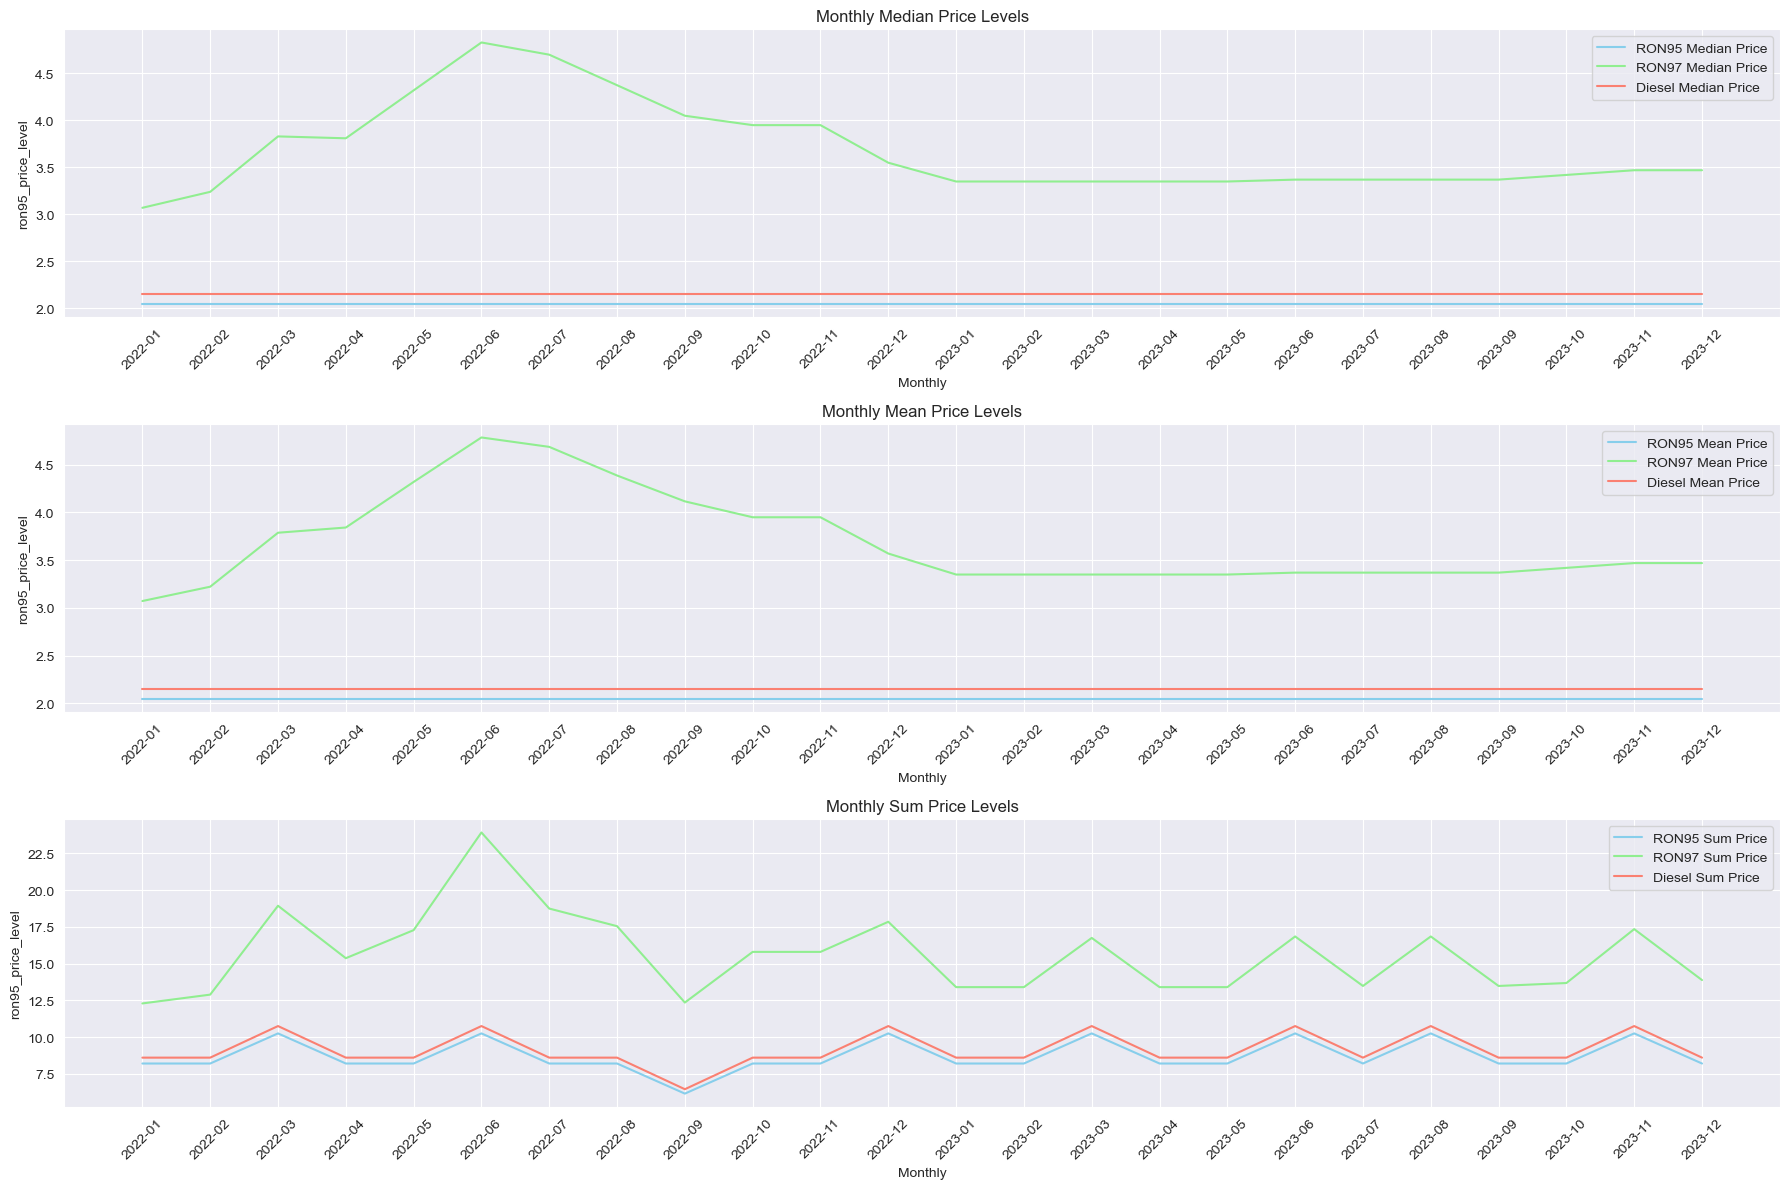

In [143]:
# Assuming DataFrames are prepared and named as follows:
# - monthly_median_data for median values
# - monthly_mean_data for mean values
# - monthly_sum_data for sum values

# Color codes for consistency across plots
colors = {
    'RON95': 'skyblue',
    'RON97': 'lightgreen',
    'Diesel': 'salmon'
}

# Set the overall figure size for the subplot
plt.figure(figsize=(18, 12))

# First subplot for Median Price Levels
plt.subplot(3, 1, 1)  # (rows, columns, panel number)
sns.lineplot(x="Monthly", y="ron95_price_level", data=monthly_median_data, label='RON95 Median Price', color=colors['RON95'])
sns.lineplot(x="Monthly", y="ron97_price_level", data=monthly_median_data, label='RON97 Median Price', color=colors['RON97'])
sns.lineplot(x="Monthly", y="diesel_price_level", data=monthly_median_data, label='Diesel Median Price', color=colors['Diesel'])
plt.title('Monthly Median Price Levels')
plt.xticks(rotation=45)
plt.legend()

# Second subplot for Mean Price Levels
plt.subplot(3, 1, 2)  # Move to the second panel
sns.lineplot(x="Monthly", y="ron95_price_level", data=monthly_mean_data, label='RON95 Mean Price', color=colors['RON95'])
sns.lineplot(x="Monthly", y="ron97_price_level", data=monthly_mean_data, label='RON97 Mean Price', color=colors['RON97'])
sns.lineplot(x="Monthly", y="diesel_price_level", data=monthly_mean_data, label='Diesel Mean Price', color=colors['Diesel'])
plt.title('Monthly Mean Price Levels')
plt.xticks(rotation=45)
plt.legend()

# Third subplot for Sum Price Levels
plt.subplot(3, 1, 3)  # Move to the third panel
sns.lineplot(x="Monthly", y="ron95_price_level", data=monthly_sum_data, label='RON95 Sum Price', color=colors['RON95'])
sns.lineplot(x="Monthly", y="ron97_price_level", data=monthly_sum_data, label='RON97 Sum Price', color=colors['RON97'])
sns.lineplot(x="Monthly", y="diesel_price_level", data=monthly_sum_data, label='Diesel Sum Price', color=colors['Diesel'])
plt.title('Monthly Sum Price Levels')
plt.xticks(rotation=45)
plt.legend()

# Adjust layout to make room for the titles and ensure clear visibility
plt.tight_layout()

# Display the combined plot
plt.show()


In [144]:
# Assuming 'refined_df' is pre-defined and the 'date' column is already in datetime format
# refined_df['date'] = pd.to_datetime(refined_df['date'])

def create_shortlisted_quarterly_data(df, operation, start_date=None, end_date=None):
    """
    Creates monthly aggregated data based on the specified operation, 
    with optional filtering by start and end dates.
    
    Parameters:
    - df: DataFrame to operate on.
    - operation: The aggregation operation ('mean', 'median', 'sum', etc.).
    - start_date: Optional; start date for filtering (inclusive).
    - end_date: Optional; end date for filtering (inclusive).
    
    Returns:
    - A DataFrame with monthly aggregated data, filtered by the specified date range (if provided).
    """
    # Copy df to avoid modifying the original
    temp_df = df.copy()
    
    # Convert 'date' to datetime if not already done
    temp_df['date'] = pd.to_datetime(temp_df['date'])

    # Filter by date range if start_date and end_date are provided
    if start_date is not None:
        temp_df = temp_df[temp_df['date'] >= pd.to_datetime(start_date)]
    if end_date is not None:
        temp_df = temp_df[temp_df['date'] <= pd.to_datetime(end_date)]
    
    # Use method chaining to set 'date' as the index, resample, and reset the index in one go
    result_df = (temp_df
                 .set_index('date')
                 .resample('Q')
                 .apply(operation)
                 .reset_index())
    
    # Convert 'date' to a string representation of the month
    result_df['Quarterly'] = result_df['date'].dt.to_period('Q').astype(str)
    
    return result_df

# Example usage:
start_date = '2022-01-01'
end_date = '2023-12-31'

quarterly_mean_data = create_shortlisted_quarterly_data(refined_df, 'mean', start_date, end_date)
quarterly_median_data = create_shortlisted_quarterly_data(refined_df, 'median', start_date, end_date)
quarterly_sum_data = create_shortlisted_quarterly_data(refined_df, 'sum', start_date, end_date)

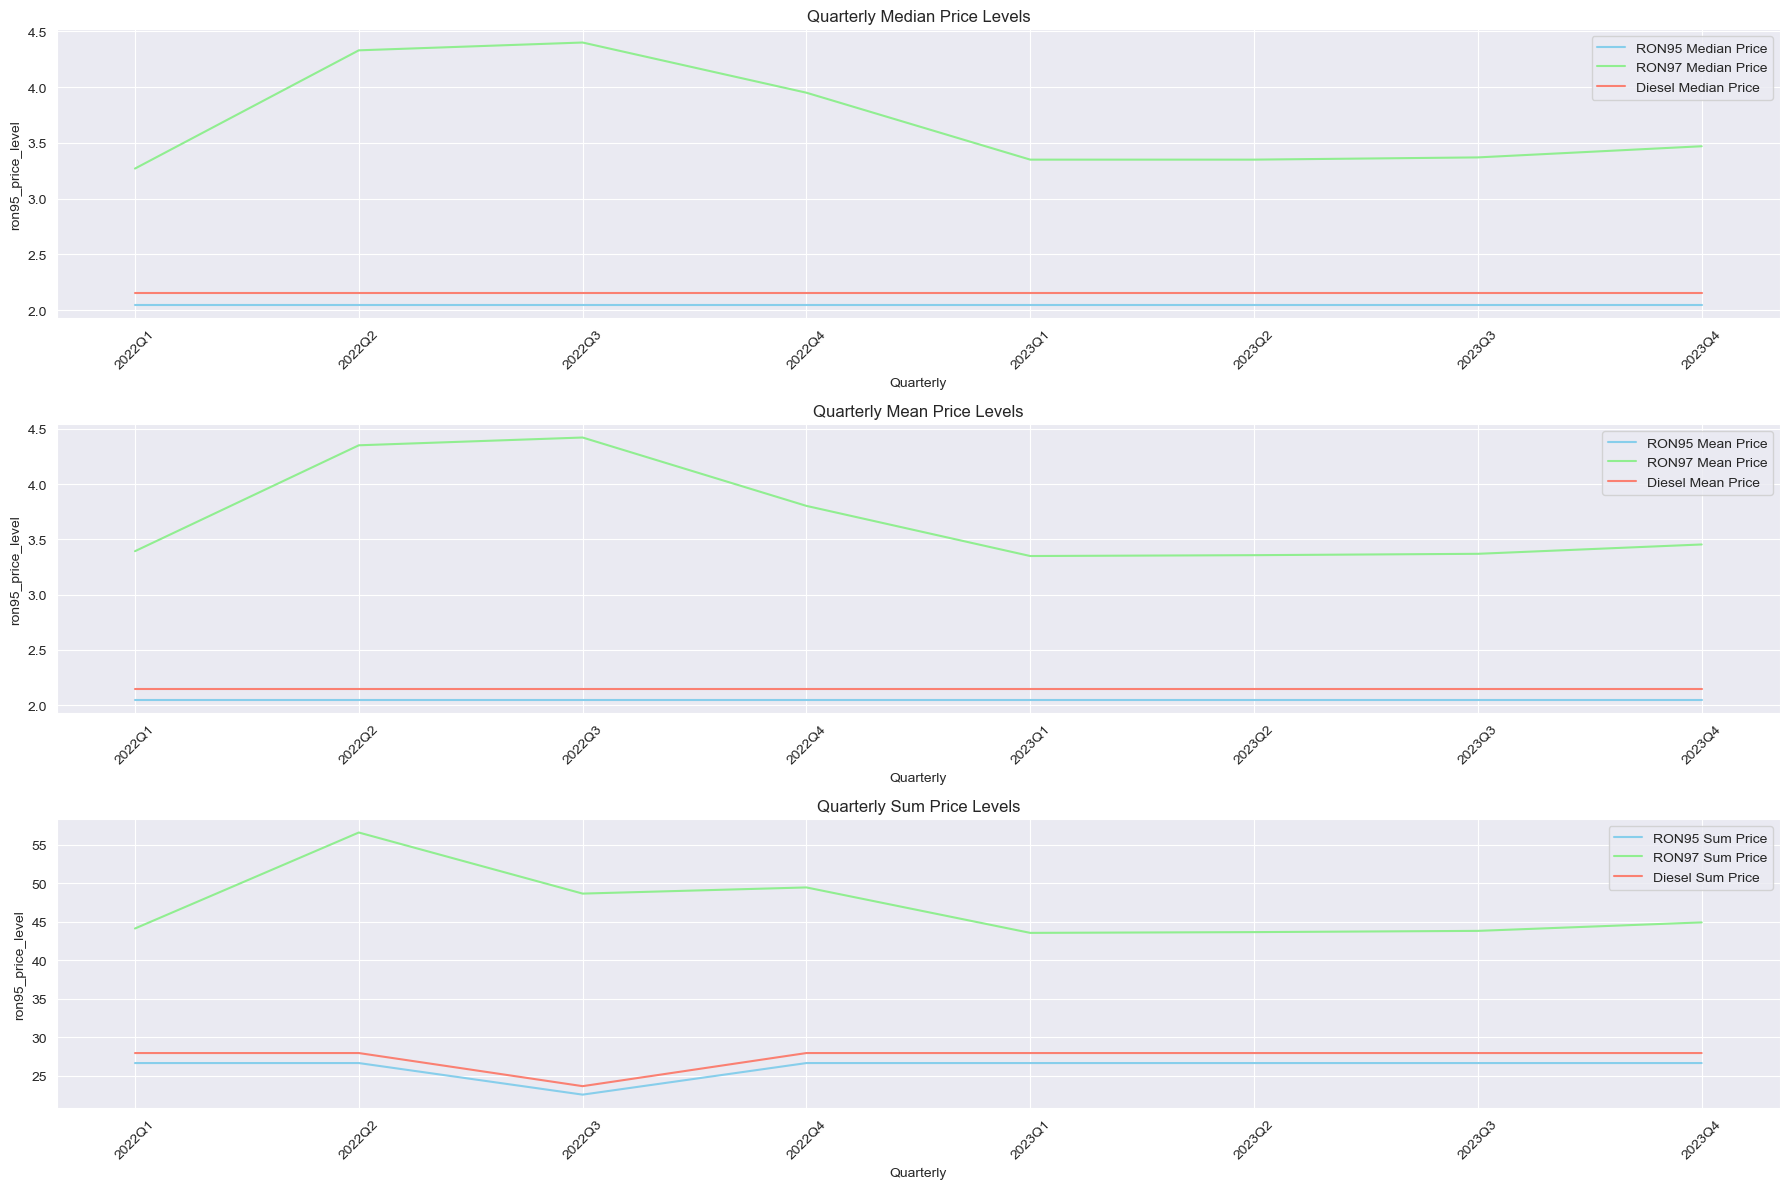

In [145]:
# Assuming DataFrames are prepared and named as follows:
# - quarterly_mean_data for median values
# - quarterly_median_data for mean values
# - quarterly_sum_data for sum values

# Color codes for consistency across plots
colors = {
    'RON95': 'skyblue',
    'RON97': 'lightgreen',
    'Diesel': 'salmon'
}

# Set the overall figure size for the subplot
plt.figure(figsize=(18, 12))

# First subplot for Median Price Levels
plt.subplot(3, 1, 1)  # (rows, columns, panel number)
sns.lineplot(x="Quarterly", y="ron95_price_level", data=quarterly_median_data, label='RON95 Median Price', color=colors['RON95'])
sns.lineplot(x="Quarterly", y="ron97_price_level", data=quarterly_median_data, label='RON97 Median Price', color=colors['RON97'])
sns.lineplot(x="Quarterly", y="diesel_price_level", data=quarterly_median_data, label='Diesel Median Price', color=colors['Diesel'])
plt.title('Quarterly Median Price Levels')
plt.xticks(rotation=45)
plt.legend()

# Second subplot for Mean Price Levels
plt.subplot(3, 1, 2)  # Move to the second panel
sns.lineplot(x="Quarterly", y="ron95_price_level", data=quarterly_mean_data, label='RON95 Mean Price', color=colors['RON95'])
sns.lineplot(x="Quarterly", y="ron97_price_level", data=quarterly_mean_data, label='RON97 Mean Price', color=colors['RON97'])
sns.lineplot(x="Quarterly", y="diesel_price_level", data=quarterly_mean_data, label='Diesel Mean Price', color=colors['Diesel'])
plt.title('Quarterly Mean Price Levels')
plt.xticks(rotation=45)
plt.legend()

# Third subplot for Sum Price Levels
plt.subplot(3, 1, 3)  # Move to the third panel
sns.lineplot(x="Quarterly", y="ron95_price_level", data=quarterly_sum_data, label='RON95 Sum Price', color=colors['RON95'])
sns.lineplot(x="Quarterly", y="ron97_price_level", data=quarterly_sum_data, label='RON97 Sum Price', color=colors['RON97'])
sns.lineplot(x="Quarterly", y="diesel_price_level", data=quarterly_sum_data, label='Diesel Sum Price', color=colors['Diesel'])
plt.title('Quarterly Sum Price Levels')
plt.xticks(rotation=45)
plt.legend()

# Adjust layout to make room for the titles and ensure clear visibility
plt.tight_layout()

# Display the combined plot
plt.show()


Now we have six DataFrames: 3 sets of monthly_data and quarterly_data.<br>
Let's proceed with further time series analysis.

In [146]:
refined_df.head(10)

,date,ron95_price_level,ron97_price_level,diesel_price_level
1,2017-04-06,2.16,2.43,2.08
2,2017-04-13,2.24,2.52,2.16
3,2017-04-20,2.27,2.54,2.21
4,2017-04-27,2.21,2.49,2.14
5,2017-05-04,2.11,2.39,2.08
6,2017-05-11,2.01,2.29,1.95
7,2017-05-18,2.08,2.36,1.99
8,2017-05-25,2.12,2.40,2.03
9,2017-06-01,2.10,2.38,2.02
10,2017-06-08,2.05,2.31,1.94


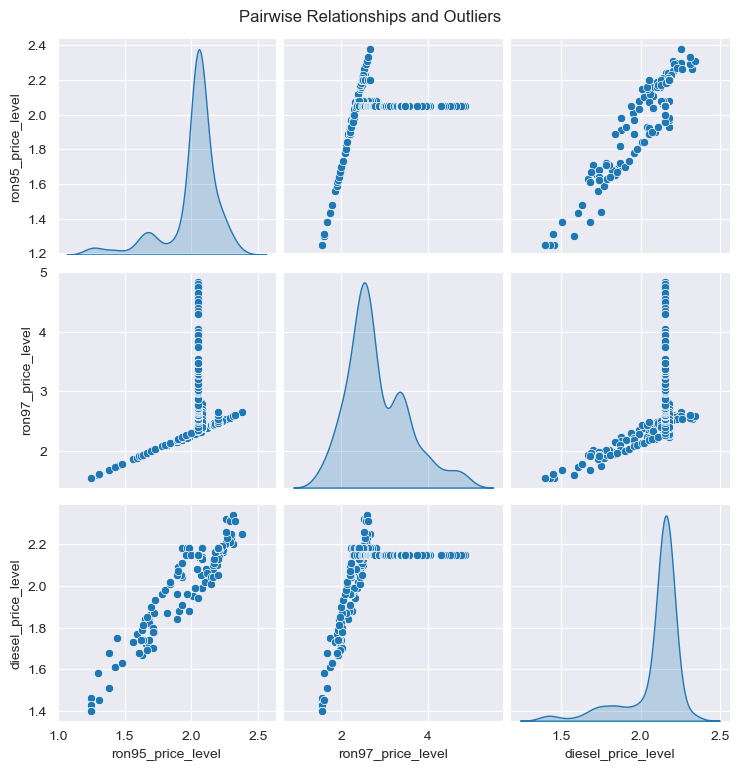

In [147]:
def plot_pairwise_outliers(df, columns):
    """
    Plots pairwise relationships in a dataset along with the distribution of
    each variable, highlighting potential outliers.

    Parameters:
    df (pandas.DataFrame): The DataFrame containing the data.
    columns (list of str): List of column names to include in the pairs plot.
    """
    # Create a pair plot
    pair_plot = sns.pairplot(df[columns], diag_kind='kde')

    # Set the title
    pair_plot.fig.suptitle('Pairwise Relationships and Outliers', y=1.02)
    
    # Show the plot
    plt.show()

# Usage example:
columns_to_include = ['ron95_price_level', 'ron97_price_level', 'diesel_price_level']
plot_pairwise_outliers(refined_df, columns_to_include)

In [148]:
# Define year range
start_year = 2022
end_year = 2023

# Filter DataFrame
filtered_df = refined_df[(refined_df['date'].dt.year >= start_year) & (refined_df['date'].dt.year <= end_year)]

# Convert date column from datetime to string
filtered_df_2 = filtered_df
filtered_df_2['date'] = filtered_df_2['date'].dt.strftime('%Y-%m-%d')

In [149]:
filtered_df.head()

,date,ron95_price_level,ron97_price_level,diesel_price_level
222,2022-01-06,2.05,3.03,2.15
223,2022-01-13,2.05,3.07,2.15
224,2022-01-20,2.05,3.07,2.15
225,2022-01-27,2.05,3.12,2.15
226,2022-02-03,2.05,3.12,2.15


In [150]:
filtered_df_2.head()

,date,ron95_price_level,ron97_price_level,diesel_price_level
222,2022-01-06,2.05,3.03,2.15
223,2022-01-13,2.05,3.07,2.15
224,2022-01-20,2.05,3.07,2.15
225,2022-01-27,2.05,3.12,2.15
226,2022-02-03,2.05,3.12,2.15


In [151]:
filtered_df.tail()

,date,ron95_price_level,ron97_price_level,diesel_price_level
319,2023-11-30,2.05,3.47,2.15
320,2023-12-07,2.05,3.47,2.15
321,2023-12-14,2.05,3.47,2.15
322,2023-12-21,2.05,3.47,2.15
323,2023-12-28,2.05,3.47,2.15


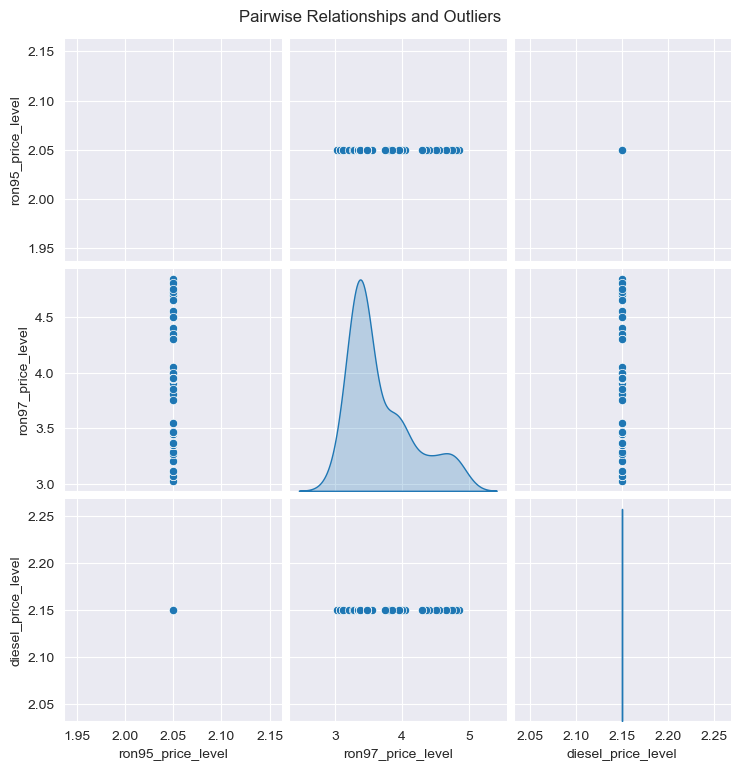

In [152]:
plot_pairwise_outliers(filtered_df, columns_to_include)

In [153]:
# Assuming df is your DataFrame and 'column' is the column you're examining
Q1 = refined_df['ron97_price_level'].quantile(0.25)
Q3 = refined_df['ron97_price_level'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = refined_df[(refined_df['ron97_price_level'] < lower_bound) | (refined_df['ron97_price_level'] > upper_bound)] 

In [154]:
outliers

,date,ron95_price_level,ron97_price_level,diesel_price_level
245,2022-06-16,2.05,4.83,2.15
246,2022-06-23,2.05,4.84,2.15
247,2022-06-30,2.05,4.84,2.15
248,2022-07-07,2.05,4.80,2.15


KeyError: 'z_scores'

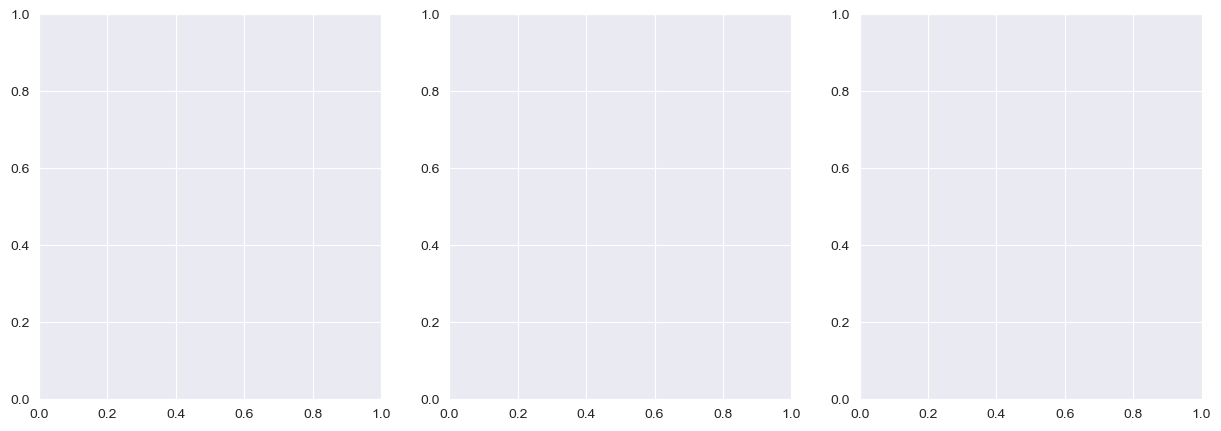

In [159]:
import matplotlib.dates as mdates

def detect_and_plot_outliers_zscore_subplots(df, date_col, columns, threshold=3):
    """
    Detects outliers in specified columns of a pandas DataFrame using the z-score method
    and plots the results highlighting the outliers in subplots with datetime on the x-axis.
    
    Parameters:
    df (pandas.DataFrame): The DataFrame containing the data.
    date_col (str): The column name containing the date information.
    columns (list of str): List of column names to check for outliers.
    threshold (float): The z-score value to use as a threshold for identifying outliers.
    """
    num_columns = len(columns)
    nrows = int(np.ceil(num_columns / 3))  # Aim for a maximum of 3 plots per row
    ncols = min(num_columns, 3)
    
    fig, axs = plt.subplots(nrows, ncols, figsize=(5 * ncols, 5 * nrows), squeeze=False)
    
    for i, column in enumerate(columns):
        row, col = divmod(i, 3)
        ax = axs[row, col]
        
        # Ensure date_col is a datetime for plotting purposes
        df[date_col] = pd.to_datetime(df[date_col])
        
        # Calculate z-scores
        df['Outlier'] = np.abs(df['z_scores']) > threshold

        # Plotting
        sns.scatterplot(data=df, x=date_col, y=column, hue='Outlier', palette={False: 'blue', True: 'red'}, ax=ax)
        ax.set_title(f'Outlier Detection in {column}')
        ax.set_xlabel('Date')
        ax.set_ylabel(column)

        # Format the x-axis to show dates
        ax.xaxis.set_major_locator(mdates.AutoDateLocator())
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
        plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha="right")

        # Remove temporary columns for z-scores and outliers
        df.drop(columns=['z_scores', 'Outlier'], inplace=True)

    # Adjust layout and remove empty subplots if any
    for i in range(num_columns, nrows * ncols):
        fig.delaxes(axs[i // ncols, i % ncols])
    plt.tight_layout()
    plt.show()

# Usage example:
date_column = 'date'
columns_to_check = ['ron95_price_level', 'ron97_price_level', 'diesel_price_level']
detect_and_plot_outliers_zscore_subplots(filtered_df_2, date_column, columns_to_check)

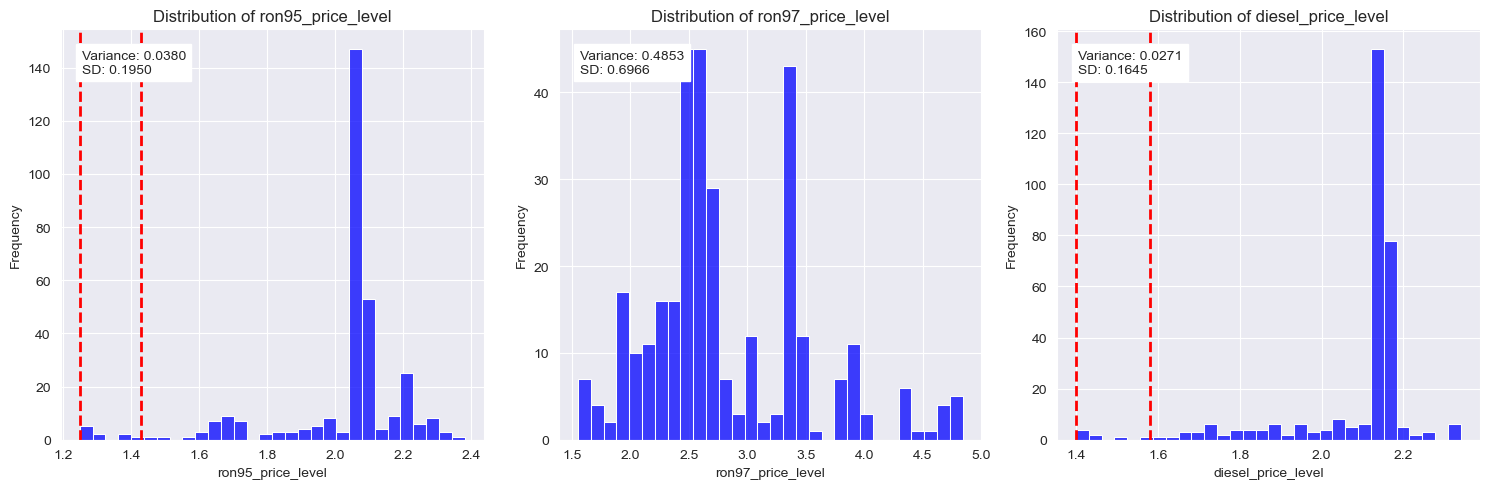

In [160]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

def detect_and_plot_histograms_with_stats(df, columns, threshold=3):
    """
    Detects outliers in specified columns of a pandas DataFrame using the z-score method,
    plots histograms of the distributions, highlights the threshold for outliers,
    and annotates each plot with the variance and standard deviation.
    
    Parameters:
    df (pandas.DataFrame): The DataFrame containing the data.
    columns (list of str): List of column names to analyze.
    threshold (float): The z-score value to use as a threshold for identifying outliers.
    """
    num_columns = len(columns)
    nrows = int(np.ceil(num_columns / 3))  # Aim for a maximum of 3 plots per row
    ncols = min(num_columns, 3)
    
    fig, axs = plt.subplots(nrows, ncols, figsize=(5 * ncols, 5 * nrows), squeeze=False)
    
    for i, column in enumerate(columns):
        row, col = divmod(i, 3)
        ax = axs[row, col]
        
        # Calculate z-scores
        df['z_scores'] = stats.zscore(df[column].dropna())
        df['Outlier'] = np.abs(df['z_scores']) > threshold
        outliers = df[df['Outlier']]
        
        # Calculate variance and standard deviation
        variance = df[column].var(ddof=1)
        std_dev = df[column].std(ddof=1)
        
        # Plotting histograms
        sns.histplot(df[column], bins=30, kde=False, ax=ax, color='blue')
        if not outliers.empty:
            ax.axvline(x=outliers[column].min(), color='red', linestyle='dashed', linewidth=2)
            ax.axvline(x=outliers[column].max(), color='red', linestyle='dashed', linewidth=2)
        
        ax.set_title(f'Distribution of {column}')
        ax.set_xlabel(column)
        ax.set_ylabel('Frequency')

        # Annotate the plot with variance and standard deviation
        ax.annotate(f'Variance: {variance:.4f}\nSD: {std_dev:.4f}', xy=(0.05, 0.95), xycoords='axes fraction',
                    horizontalalignment='left', verticalalignment='top', fontsize=10, backgroundcolor='white')

        # Remove temporary columns for z-scores and outliers
        df.drop(columns=['z_scores', 'Outlier'], inplace=True)
    
    # Adjust layout and remove empty subplots if any
    for i in range(num_columns, nrows * ncols):
        fig.delaxes(axs[i // ncols, i % ncols])
    plt.tight_layout()
    plt.show()

# Usage example:
columns_to_check = ['ron95_price_level', 'ron97_price_level', 'diesel_price_level']
detect_and_plot_histograms_with_stats(refined_df, columns_to_check)

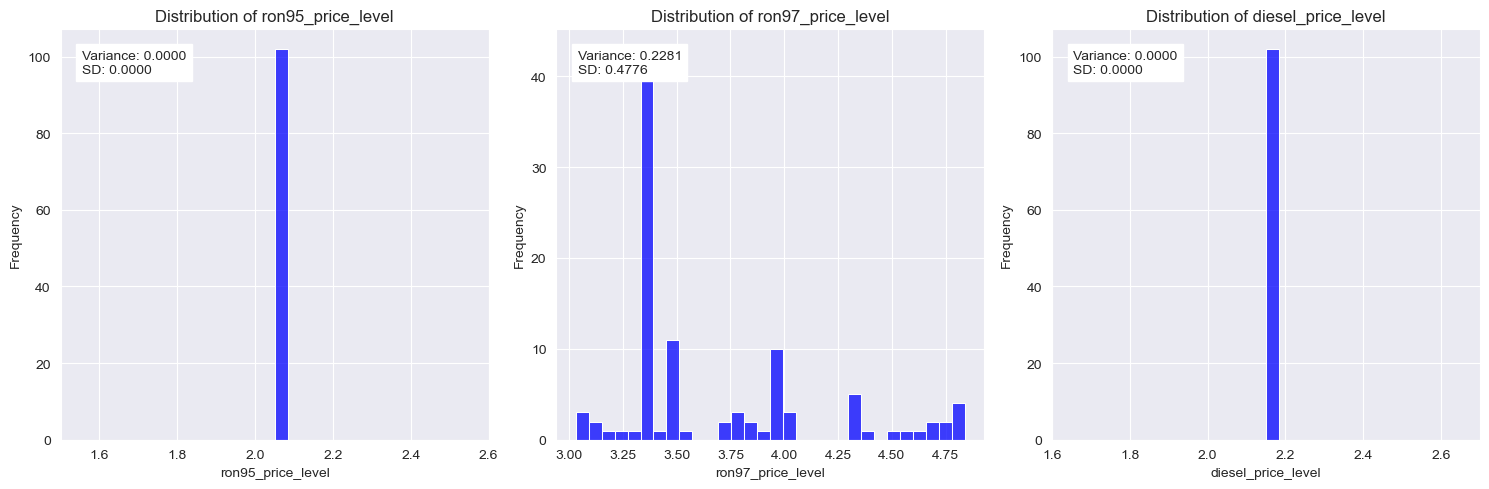

In [156]:
columns_to_check = ['ron95_price_level', 'ron97_price_level', 'diesel_price_level']
detect_and_plot_histograms_with_stats(filtered_df, columns_to_check)

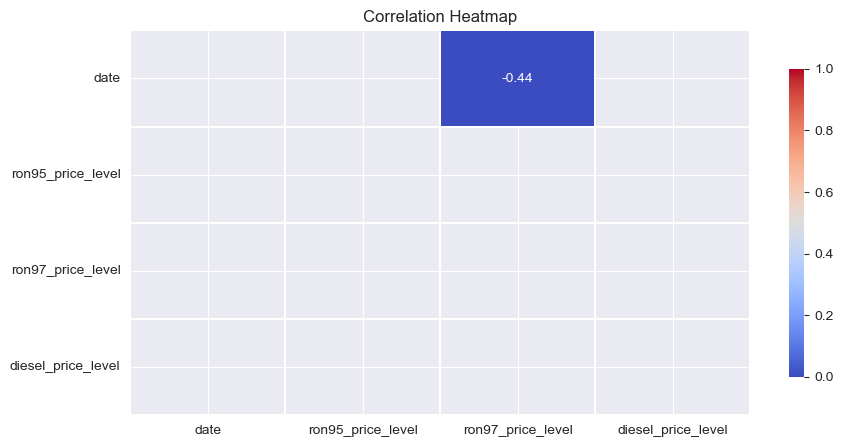

In [161]:
# Round the numeric data to 3 decimal places
filtered_df_rounded = filtered_df_2.round(3)

# Calculate the correlation matrix
correlation_matrix = filtered_df_2.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 5))

# Generate a mask that covers the lower triangle of the correlation matrix
mask = np.tril(np.ones_like(correlation_matrix, dtype=bool))

# Plot the heatmap with an explicit format string for annotations
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap="coolwarm", fmt=".2f", vmax=1.0, vmin = 0.0, center=0.5, 
            linewidths=0.2, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap')
plt.show()

In [162]:
filtered_df.head()

,date,ron95_price_level,ron97_price_level,diesel_price_level
222,2022-01-06,2.05,3.03,2.15
223,2022-01-13,2.05,3.07,2.15
224,2022-01-20,2.05,3.07,2.15
225,2022-01-27,2.05,3.12,2.15
226,2022-02-03,2.05,3.12,2.15


## Conclusion: 
Based on the variation and standard deviation comparison refined_data and filtered_data, it is deducible that Fuel Price of RON95 and diesel doesn't have impact on upcoming analytics. <br> 
If there is a need, only 'ron97_price_level' between January 2022 to December 2023 to be included for further Food Price Analytics from geospatial and time series perspective. 

# Archive

In [ ]:
from pandasql import sqldf

# Helper function to use pandasql
pysqldf = lambda q: sqldf(q, globals())

# Example query to find rows with missing data in the 'example_column'
query = """
SELECT *
FROM quarterly_mean_data
WHERE date BETWEEN '2018-10-01' AND '2018-12-31' 
ORDER BY date DESC;
"""

missing_data_df = pysqldf(query)
missing_data_df

In [ ]:
import pandas as pd

# Ensure 'date' column in 'refined_df_subset' is in datetime format upfront
refined_df_subset['date'] = pd.to_datetime(refined_df_subset['date'])

def create_semi_annual_data(df, operation):
    """
    Create aggregated data on a semi-annual basis using the specified operation.

    Parameters:
    - df: DataFrame to aggregate.
    - operation: Aggregation operation ('mean', 'median', 'sum').

    Returns:
    - DataFrame with aggregated data, including a 'SemiAnnual' column indicating the period.
    """
    # Copy df to avoid modifying the original, set 'date' as the index, and resample every two quarters
    result_df = df.copy().set_index('date').resample('2Q').apply(operation)
    
    # Reset the index so 'date' becomes a column again
    result_df.reset_index(inplace=True)
    
    # Convert 'date' to a string representation of the semi-annual period
    result_df['SemiAnnual'] = result_df['date'].dt.to_period('Q').astype(str).apply(
        lambda x: x[:-1] + 'H1' if int(x[-1]) <= 2 else x[:-1] + 'H2'
    )
    
    # Drop the original 'date' column as we now have 'SemiAnnual'
    result_df = result_df.drop(columns=['date'])
    
    return result_df

# Example usage:

# Create semi-annual DataFrames with mean, median, and sum values
semi_annual_mean_data = create_semi_annual_data(refined_df_subset, 'mean')
semi_annual_median_data = create_semi_annual_data(refined_df_subset, 'median')
semi_annual_sum_data = create_semi_annual_data(refined_df_subset, 'sum')

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample DataFrame creation based on the structure from your image
data = {
    'date': pd.to_datetime(['2022-01-06', '2022-01-13', '2022-01-20', '2022-01-27', '2022-02-03']),
    'ron95_price_level': [2.05, 2.05, 2.05, 2.05, 2.05],
    'ron97_price_level': [3.03, 3.07, 3.07, 3.12, 3.12],
    'diesel_price_level': [2.15, 2.15, 2.15, 2.15, 2.15]
}
df = pd.DataFrame(data)

# Transform the DataFrame for the heatmap
df_melted = df.melt(id_vars=['date'], var_name='Fuel Type', value_name='Price Level')

# Pivot for the heatmap format
df_pivoted = df_melted.pivot("date", "Fuel Type", "Price Level")

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_pivoted, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Fuel Price Levels Over Time")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()  # Adjust the layout so labels don't get cut off
plt.show()
